# Intro to Machine Learning - Data Prep

For our first machine learning project we will try to predict the sale price of homes to develop a better estimate of their value.  A great dataset to use is the King's County home sale data.  This dataset contains historic home sale data for King's County in Washington state, including the city of Seattle.  Over the course of these labs we will prepare the data (including cleaning and filtering), fit it with several supervised regression models, and then fit it with unsupervised models.

Several things need to be done to prepare the data.  First, we need to explore the dataset to learn what it contains, a bit about its characteristics, and gain a general sense of understanding of the feature statistics.  Second, we need to determine if there are any incorrect or missing values, and correct them.  Finally, we need to standardize the features so that are not on disparate scales.

To begin, let's import pandas for data manipulation, and Matplotlib and Seaborn for plotting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's read in the data.

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

Let's grab the first few rows of the data to see the types of data contained in the dataset. 

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's also print off a list of the data columns.

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Using ``.describe``, get summary statistics for every data column.  Do these values make sense?

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The mean price is informative, but it can be skewed by extreme values.  What is the median?

In [6]:
df['price'].median()

450000.0

If there are any extremely odd entries that you consider to be bad data, identify the data rows, investigate them, and decide how you want to handle them.

In [7]:
df = df[df['price'] < 1500000]
df = df[df['bedrooms'] < 10]

We haven't seen any Null values so far, but as we previously saw in the Pandas lab, just a few can be buried in a big dataset.  Using the same methods we previously did, count the number of Null values in each column.  You may need to refer back to your labs on Pandas.  If you find any Null values, remove them.

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Briefly write a paragraph summarizing the type of data in our dataset, the unique datatypes within it, and the scales of the data in each column.

Notes about data types:

Now that we have a general sense of the type of data we have, let's dig into it a bit more.  Using the visualization techniques and tools we covered, make a few plots to understand how the data is distributed and how the variables are related.  If you find anything you think could be important to remember for modeling, make note of it below.

Since we want to predict price, it is important to understand how the other variables are correlated with it.  Also, we need to know how the home sale price and the feature variables are distributed.  

In [ ]:
Notes about data relationships:

Now that we have a good idea for what data columns may be important and the data types they contain, we can consider which ones need to be dropped or augmented.  Which columns are effectively duplicates and strongly correlated?  The ``.corr`` method and ``heatmap`` plot from Seaborn may be helpful for the latter task.  

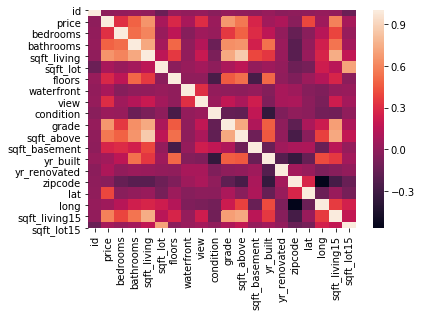

In [10]:
corr = df.corr()
sns.heatmap(corr)

Let's create a data column with a simple true/false flag for if the house has been renovated.

In [11]:
df['renovated'] = df['yr_renovated'] > 1
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,False
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,True
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,False
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,False
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,False


Now that we have a column to account for renovations, let's drop columns that we don't want to include in our modeling.

In [12]:
df = df.drop(columns=['id', 'date', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                      'zipcode', 'sqft_living15', 'sqft_lot15', 'view', 'condition'])

As a final preparation step use the ``MinMaxScaler`` function from Sci-kit Learn to scale the data.  You don't want to scale the prediction column, so make a list of the columns you don't want to scale.

In [13]:
from sklearn.preprocessing import MinMaxScaler

keep_cols = df.columns[1:]

scaler = MinMaxScaler()

df[keep_cols] = scaler.fit_transform(df[keep_cols])

Save the cleaned data to a ``.csv`` file using the ``.to_csv()`` function.

In [14]:
df.to_csv('cleaned_data.csv')